In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### DIfference between ML- and MAP- estimates of a coin-toss. True P(X=1) = 0.5

In [17]:
def simulateCoinFlips(Nflips,beta_priors):
    ml_estimates =[]
    map_estimates = []
    true_prob = 0.5*np.ones(Nflips)
    (beta_0,beta_1) = beta_priors    
    alpha_0,alpha_1 = (0,0)
    observations = np.random.randint(0,2,Nflips)
    for x in observations:
        alpha_0+=(1-x)
        alpha_1+=x
        ml_estimate = alpha_0/(alpha_0+alpha_1)
        map_estimate = (alpha_0+beta_0-1)/(alpha_0+beta_0-1 + alpha_1+beta_1-1)
        ml_estimates.append(ml_estimate)
        map_estimates.append(map_estimate)
    
    plt.plot(list(range(1,Nflips+1)),ml_estimates,'-b',map_estimates,'-r', true_prob, '-k' )
    plt.title(f'ML vs MAP Estimates of a coin flip probability for {Nflips} flips. Prior probability is Beta{beta_priors}')
    plt.xlabel('No of flips')
    plt.ylabel('Probability esitimate')
    plt.grid()
    plt.legend(['ML','MAP', 'True Probability'])
    plt.show()
    
    

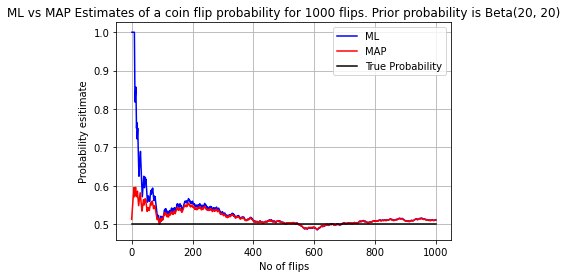

In [22]:
#CASE 1 : beta is close to Nflips. Choose Nflips = 100, beta_priors = (80,80). MLE is away from MAP as we haven't had enough
# for the alphas to overshadow the betas
#CASE 2 : beta is close to Nflips. Choose Nflips = 100, beta_priors = (20,20). MLE is closer to MAP now.
#Notice that in both CASE1 and 2, the estimates may be a bit away from the true value.
#CASE 3 : Increase Nflips to 1000 and keep beta_priors = (20,20). Both estimates are close to each other and to the true value
Nflips = 1000
beta_priors = (20,20)
simulateCoinFlips(Nflips,beta_priors)

### DIfference between ML- and MAP- estimates of a Bernoulli Distribution parameter with a general true value of P(X=1)

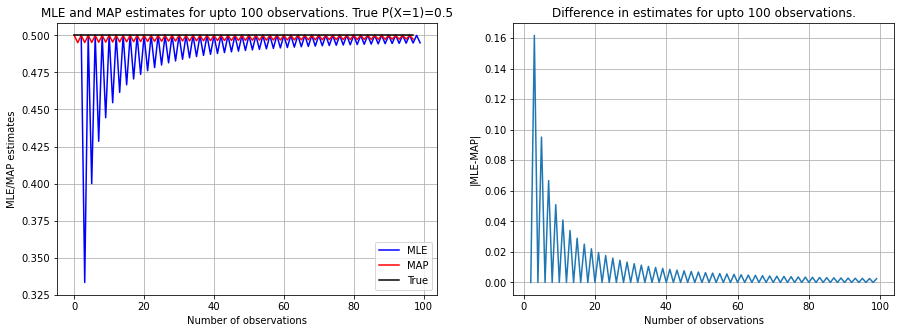

In [24]:
# Prior knowlege
true_probability = 0.5 # beta_1/(beta_0+beta_1) 
Max_Observations = 100 # beta_1 + beta_0
beta_1 = int(Max_Observations*true_probability)
beta_0 = Max_Observations-beta_1

alpha_ratio = true_probability # Maintain the same ratio,change volume of observations
map_estimates = []
ml_estimates = []
estimate_diffs = []
for N_observations in range(2,Max_Observations):
    alpha_1 = int(N_observations*alpha_ratio)
    alpha_0 = N_observations-alpha_1
    ml_estimate = (alpha_1)/(alpha_1+alpha_0)
    map_estimate = (alpha_1+beta_1-1)/(alpha_1+beta_1-1 + alpha_0+beta_0-1)
    estimate_diff = np.abs(ml_estimate-map_estimate)
    ml_estimates.append(ml_estimate) 
    map_estimates.append(map_estimate)
    estimate_diffs.append(estimate_diff)


f, axes = plt.subplots(1,2,figsize=(15,5))
axes[0].plot(list(range(2,Max_Observations)),ml_estimates,'-b',map_estimates,'-r',[true_probability]*len(range(2,Max_Observations)),'-k')
axes[0].set_xlabel('Number of observations')
axes[0].set_ylabel('MLE/MAP estimates')
axes[0].set_title(f'MLE and MAP estimates for upto {Max_Observations} observations. True P(X=1)={true_probability}')
axes[0].legend(['MLE','MAP','True'])
axes[0].grid()

axes[1].plot(list(range(2,Max_Observations)),estimate_diffs)
axes[1].set_xlabel('Number of observations')
axes[1].set_ylabel('|MLE-MAP|')
axes[1].set_title(f'Difference in estimates for upto {Max_Observations} observations.')
axes[1].grid()
plt.show()

In [25]:
def plotLikelihoodFunction(alpha_values): # For X ~ Bernoulli(theta), The likelihood of alpha_1 occurences of X=1 and alpha_0 occurence
    # of X = 0 is given by theta^(alpha_1) + (1-theta)^(aLpha_2)
    Nplots = len(alpha_values)
    f, axes = plt.subplots(Nplots,1,figsize=(15,15))
    theta = np.arange(0,1,0.01)
    current_alpha_index = 0
    for r in range(Nplots):
        alpha_0 = alpha_values[current_alpha_index][0]
        alpha_1 = alpha_values[current_alpha_index][1]
        L_theta = theta**alpha_1*(1-theta)**alpha_0
        max_likelihood_estimate = theta[np.argmax(L_theta)]
        axes[r].plot(theta,L_theta)
        axes[r].grid()
        axes[r].set_title(f'{(alpha_0,alpha_1)}')
        current_alpha_index+=1


### For the same ratio $\frac{\alpha_0}{\alpha_0+\alpha_1}$, more observations implies more confidence in the estimate

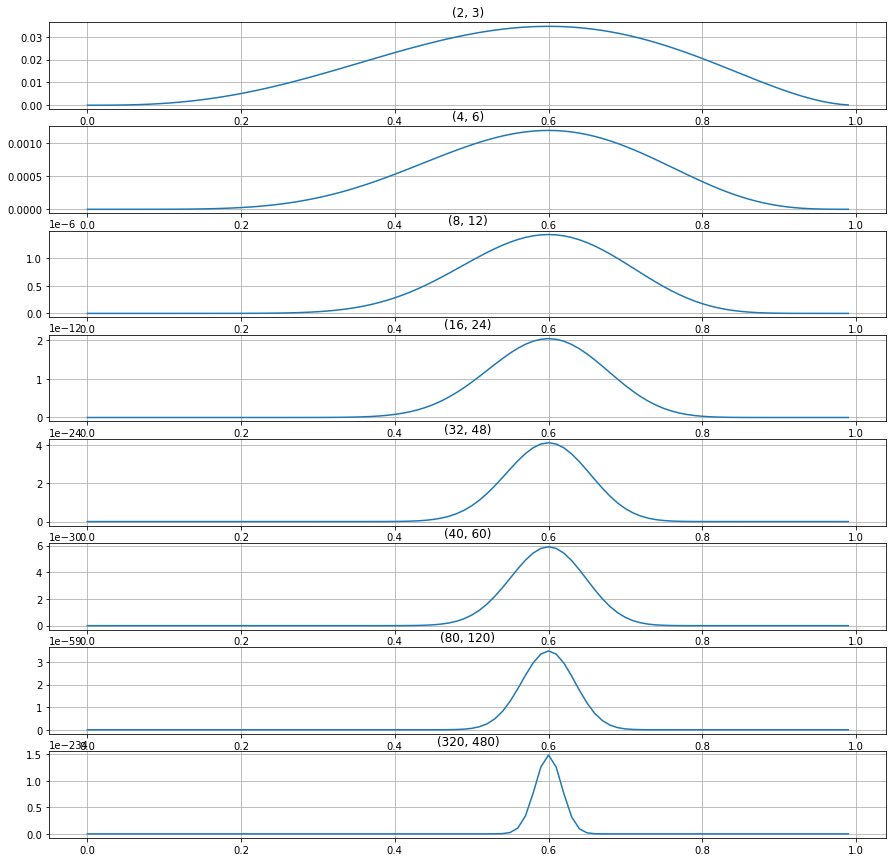

In [26]:
alpha_tuple = [(2,3),(4,6),(8,12),(16,24),(32,48),(40,60),(80,120),(320,480)]
plotLikelihoodFunction(alpha_tuple)

In [ ]:
def plotWeightedLikelihoodFunction(alpha_values,wt):
    Nplots = len(alpha_values)
    f, axes = plt.subplots(Nplots,1,figsize=(15,15))
    theta = np.arange(0,1,0.01)
    current_alpha_index = 0
    for r in range(Nplots):
        alpha_0 = alpha_values[current_alpha_index][0]
        alpha_1 = alpha_values[current_alpha_index][1]
        L_theta = theta**(alpha_1+2)*(1-theta)**(alpha_0+2)/wt
        max_likelihood_estimate = theta[np.argmax(L_theta)]
        axes[r].plot(theta,L_theta)
        axes[r].grid()
        axes[r].set_title(f'{(alpha_0,alpha_1)}')
        current_alpha_index+=1


In [ ]:
alpha_tuple = [(2,3),(4,6),(8,12),(16,24),(32,48),(40,60),(80,120),(320,480)]
beta_wt = 0.0333
plotWeightedLikelihoodFunction(alpha_tuple,beta_wt)

### DIfference between ML- and MAP- estimates of $P(X=k), k=0,...,n-1$ where $X \sim Categorical(\frac{1}{n},...,\frac{1}{n})$

In [113]:
def simulateNsidedCoinFlipsEquiprobable(Nsides,Nflips,beta_priors):
    ml_estimates = np.zeros((Nsides,Nflips))
    map_estimates = np.zeros((Nsides,Nflips))
    alpha = np.zeros(Nsides)
    observations = np.random.randint(0,Nsides,Nflips)
    for i in range(Nflips):
        observed = observations[i]
        alpha[observed]+=1
        ml_estimate = alpha/(np.sum(alpha))
        ml_estimates[:,i] = ml_estimate
        map_estimate = (alpha-beta_priors)/(np.sum(alpha)+np.sum(beta_priors)-Nsides)
        map_estimates[:,i]=map_estimate

    return ml_estimates,map_estimates
    

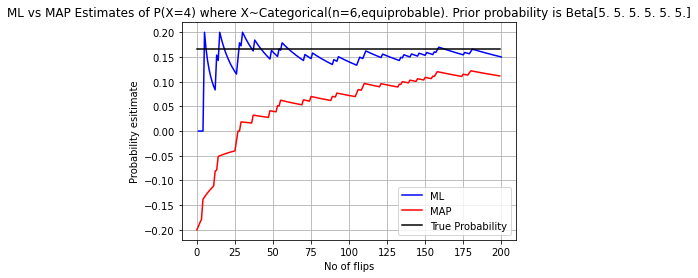

In [117]:
#Change the weight multiplied to beta_prior. Increasing it will increase the difference between the estimates and vice-versa.
#Change the value of Nflips. Increasing it will force the estimates closer to the true prob value and vice versa
Nsides = 6
Nflips = 200
beta_prior = 5*np.ones(Nsides)
(ml_est,map_est) = simulateNsidedCoinFlipsEquiprobable(Nsides,Nflips,beta_prior)

#PLOT

n=4
true_prob = 1/Nsides*np.ones(Nflips)
plt.plot(list(range(1,Nflips+1)),ml_est[n,:],'-b',map_est[n,:],'-r',true_prob,'-k')
plt.title(f'ML vs MAP Estimates of P(X={n}) where X~Categorical(n={Nsides},equiprobable). Prior probability is Beta{beta_prior}')
plt.xlabel('No of flips')
plt.ylabel('Probability esitimate')
plt.grid()
plt.legend(['ML','MAP','True Probability'])
plt.show()

### DIfference between ML- and MAP- estimates of $P(X=k), k=0,...,n-1$ where $X \sim Categorical(p_0,...,p_{n-1})$

In [99]:
def simulateNsidedCoinFlipsGeneral(Nsides,Nflips,actual_probabilities,beta_priors):
    ml_estimates = np.zeros((Nsides,Nflips))
    map_estimates = np.zeros((Nsides,Nflips))
    
    for nflips in range(2,Nflips+2):         
            alpha = np.random.multinomial(nflips,actual_probabilities,1)[0]
            ml_estimate = alpha/(np.sum(alpha))
            ml_estimates[:,nflips-2] = ml_estimate
            map_estimate = (alpha-beta_priors)/(np.sum(alpha)+np.sum(beta_priors)-Nsides)
            map_estimates[:,nflips-2]=map_estimate

    return ml_estimates,map_estimates
    

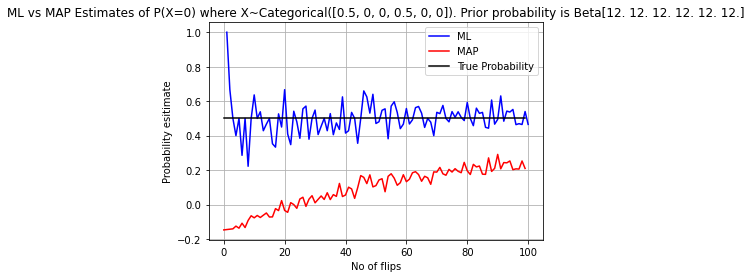

In [118]:
#Change the weight multiplied to beta_prior. Increasing it will increase the difference between the estimates and vice-versa.
#Change the value of Nflips. Increasing it will force the estimates closer to the true prob value and vice versa

Nsides = 6
Nflips = 100
prior_prob = np.ones(Nsides)/Nsides
prior_prob = [0.5,0,0,0.5,0,0]
beta_prior = 12*np.ones(Nsides)
(ml_est,map_est) = simulateNsidedCoinFlipsGeneral(Nsides,Nflips,prior_prob,beta_prior)

#PLOT

n=0
true_prob = prior_prob[n]*np.ones(Nflips)
plt.plot(list(range(1,Nflips+1)),ml_est[n,:],'-b',map_est[n,:],'-r',true_prob,'-k')
plt.title(f'ML vs MAP Estimates of P(X={n}) where X~Categorical({prior_prob}). Prior probability is Beta{beta_prior}')
plt.xlabel('No of flips')
plt.ylabel('Probability esitimate')
plt.grid()
plt.legend(['ML','MAP','True Probability'])
plt.show()